In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality/Air_Quality.csv


# The "Air-Quality" dataset contains information about air quality measurements in different countries and cities. Each row represents a specific measurement and includes various parameters related to air quality.
### Country: This column represents the name of the country where the air quality measurement was taken.
### City: This column contains the name of the city where the air quality measurement was conducted.
### AQI Value: AQI stands for Air Quality Index, which is a numerical value that represents the overall air quality at a specific location. This column contains an integer value representing the AQI measurement.
### AQI Category: This column provides a categorical description of the air quality based on the AQI value. It represents the overall air quality category, such as "Good," "Moderate," "Unhealthy," etc.
### CO AQI Value: This column represents the Air Quality Index specifically for carbon monoxide (CO) levels. It contains an integer value representing the CO AQI measurement.
### CO AQI Category: Similar to the AQI Category, this column provides a categorical description of the air quality based on the CO AQI value. It represents the air quality category specifically related to carbon monoxide levels.
### Ozone AQI Value: This column represents the Air Quality Index specifically for ozone (O3) levels. It contains an integer value representing the Ozone AQI measurement.
### Ozone AQI Category: This column provides a categorical description of the air quality based on the Ozone AQI value. It represents the air quality category specifically related to ozone levels.
### NO2 AQI Value: This column represents the Air Quality Index specifically for nitrogen dioxide (NO2) levels. It contains an integer value representing the NO2 AQI measurement.
### NO2 AQI Category: Similar to the previous categories, this column provides a categorical description of the air quality based on the NO2 AQI value. It represents the air quality category specifically related to nitrogen dioxide levels.
### PM2.5 AQI Value: This column represents the Air Quality Index specifically for particulate matter (PM2.5) levels. It contains an integer value representing the PM2.5 AQI measurement.
### PM2.5 AQI Category: This column provides a categorical description of the air quality based on the PM2.5 AQI value. It represents the air quality category specifically related to particulate matter levels.

In [2]:
airq = pd.read_csv("/kaggle/input/air-quality/Air_Quality.csv")
airq

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16692,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,36.3385,-88.8513
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [3]:
airq.drop(columns=['lat','lng'], axis=1, inplace=True)
airq

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate
16692,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good


In [4]:
airq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             16393 non-null  object
 1   City                16695 non-null  object
 2   AQI Value           16695 non-null  int64 
 3   AQI Category        16695 non-null  object
 4   CO AQI Value        16695 non-null  int64 
 5   CO AQI Category     16695 non-null  object
 6   Ozone AQI Value     16695 non-null  int64 
 7   Ozone AQI Category  16695 non-null  object
 8   NO2 AQI Value       16695 non-null  int64 
 9   NO2 AQI Category    16695 non-null  object
 10  PM2.5 AQI Value     16695 non-null  int64 
 11  PM2.5 AQI Category  16695 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.5+ MB


In [5]:
airq['Country'].value_counts()

United States of America    3954
Germany                     1072
Brazil                       890
Russian Federation           889
Italy                        866
                            ... 
Luxembourg                     1
Saint Lucia                    1
Republic of Korea              1
Solomon Islands                1
Monaco                         1
Name: Country, Length: 174, dtype: int64

#### There were few null values, hence filling them with the country which has highest number of appearances

In [6]:
airq['Country'].fillna('United States of America', inplace=True)
airq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             16695 non-null  object
 1   City                16695 non-null  object
 2   AQI Value           16695 non-null  int64 
 3   AQI Category        16695 non-null  object
 4   CO AQI Value        16695 non-null  int64 
 5   CO AQI Category     16695 non-null  object
 6   Ozone AQI Value     16695 non-null  int64 
 7   Ozone AQI Category  16695 non-null  object
 8   NO2 AQI Value       16695 non-null  int64 
 9   NO2 AQI Category    16695 non-null  object
 10  PM2.5 AQI Value     16695 non-null  int64 
 11  PM2.5 AQI Category  16695 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.5+ MB


#### Finding and removing the duplicates from the dataset

In [7]:
duplicates = airq.duplicated().sum()
duplicates

2466

In [8]:
airq = airq.drop_duplicates()
airq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14229 entries, 0 to 16694
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             14229 non-null  object
 1   City                14229 non-null  object
 2   AQI Value           14229 non-null  int64 
 3   AQI Category        14229 non-null  object
 4   CO AQI Value        14229 non-null  int64 
 5   CO AQI Category     14229 non-null  object
 6   Ozone AQI Value     14229 non-null  int64 
 7   Ozone AQI Category  14229 non-null  object
 8   NO2 AQI Value       14229 non-null  int64 
 9   NO2 AQI Category    14229 non-null  object
 10  PM2.5 AQI Value     14229 non-null  int64 
 11  PM2.5 AQI Category  14229 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.4+ MB


#### Checking for any outliers in the dataset

In [9]:
airq.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,14229.000000,14229.000000,14229.000000,14229.000000,14229.000000
mean,62.975824,1.317450,32.532645,3.491812,59.624359
std,43.313057,1.970172,23.285521,5.634884,43.448684
min,7.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,1.000000,21.000000,0.000000,34.000000
50%,52.000000,1.000000,30.000000,1.000000,51.000000
75%,69.000000,1.000000,38.000000,4.000000,68.000000
max,500.000000,133.000000,222.000000,91.000000,500.000000


In [10]:
extreme = airq[airq['AQI Value']>100]
extreme

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
15,Brazil,Pinheiral,154,Unhealthy,5,Good,0,Good,13,Good,154,Unhealthy
32,India,Darbhanga,247,Very Unhealthy,3,Good,162,Unhealthy,1,Good,247,Very Unhealthy
37,Haiti,Delmas,124,Unhealthy for Sensitive Groups,2,Good,15,Good,5,Good,124,Unhealthy for Sensitive Groups
60,China,Hangzhou,203,Very Unhealthy,5,Good,203,Very Unhealthy,5,Good,151,Unhealthy
74,India,Tekkali,155,Unhealthy,3,Good,82,Moderate,1,Good,155,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...
16625,India,Sainthia,120,Unhealthy for Sensitive Groups,3,Good,108,Unhealthy for Sensitive Groups,2,Good,120,Unhealthy for Sensitive Groups
16638,Pakistan,Mian Channun,252,Very Unhealthy,2,Good,135,Unhealthy for Sensitive Groups,1,Good,252,Very Unhealthy
16651,Viet Nam,Vinh,105,Unhealthy for Sensitive Groups,4,Good,27,Good,6,Good,105,Unhealthy for Sensitive Groups
16686,China,Wangqing,101,Unhealthy for Sensitive Groups,3,Good,35,Good,2,Good,101,Unhealthy for Sensitive Groups


In [11]:
airq['Country'].nunique()

174

## 1) How does the overall air quality vary across different countries? Or what are the cities with highest and lowest air quality values?

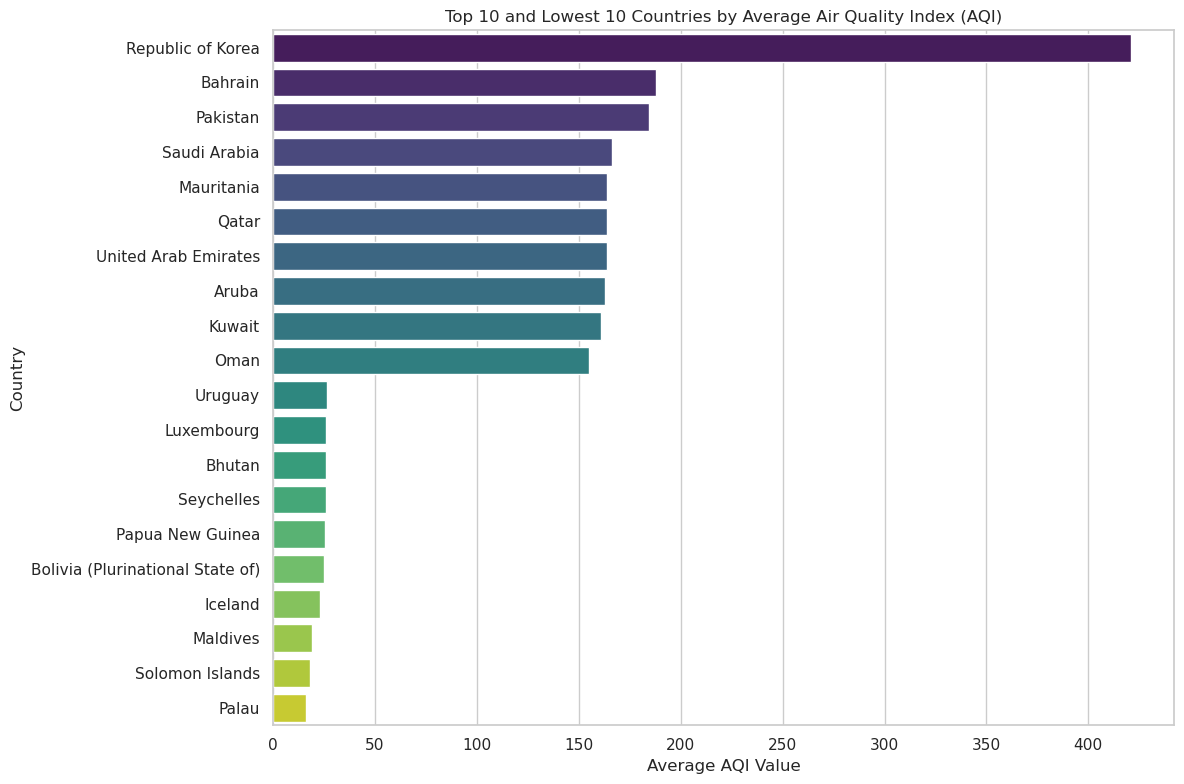

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_aqi_by_country = airq.groupby('Country')['AQI Value'].mean().reset_index()

avg_aqi_by_country = avg_aqi_by_country.sort_values('AQI Value', ascending=False)

top_10_countries = avg_aqi_by_country.head(10)
lowest_10_countries = avg_aqi_by_country.tail(10)

combined_countries = pd.concat([top_10_countries, lowest_10_countries])

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(data=combined_countries, x='AQI Value', y='Country', palette='viridis')
plt.title('Top 10 and Lowest 10 Countries by Average Air Quality Index (AQI)')
plt.xlabel('Average AQI Value')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

#### Countries like Republic of Korea and few gulf countries highest average AQI value while countries like Palau, Solomon Islands have low average AQI values which is safer to breathe.

## 2) What is the distribution of air quality categories in the dataset?

/tmp/ipykernel_295/4065320319.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


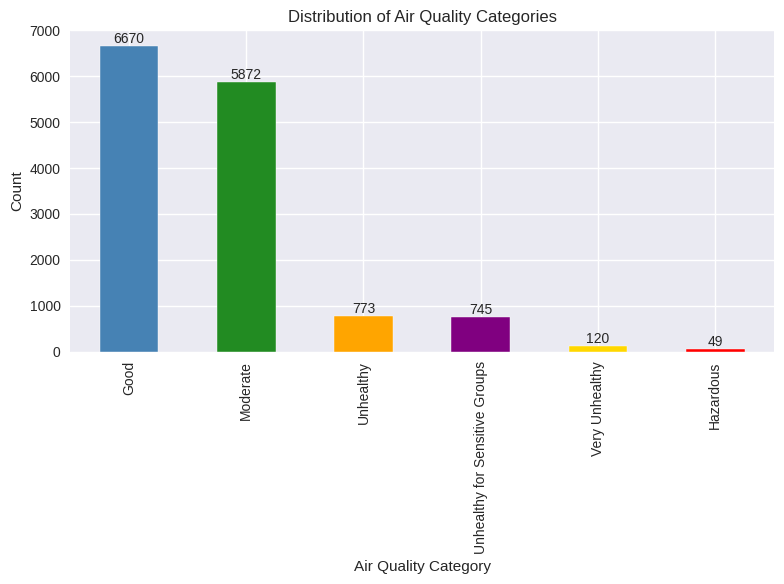

In [19]:
category_counts = airq['AQI Category'].value_counts()

sorted_categories = category_counts.sort_values(ascending=False)

colors = ['steelblue', 'forestgreen', 'orange', 'purple', 'gold', 'red']

plt.figure(figsize=(8, 6))
plt.style.use('seaborn')

sorted_categories.plot(kind='bar', color=colors)

plt.title('Distribution of Air Quality Categories')
plt.xlabel('Air Quality Category')
plt.ylabel('Count')

for i, count in enumerate(sorted_categories):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### The dataset has most of the cities from different countries having Good and Moderate Air Quality which is good to breathe while there are around 1,500 cities with bad Air Quality

## 3) How do the AQI values for different pollutants (CO, Ozone, NO2, PM2.5) compare?

/tmp/ipykernel_295/347227862.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


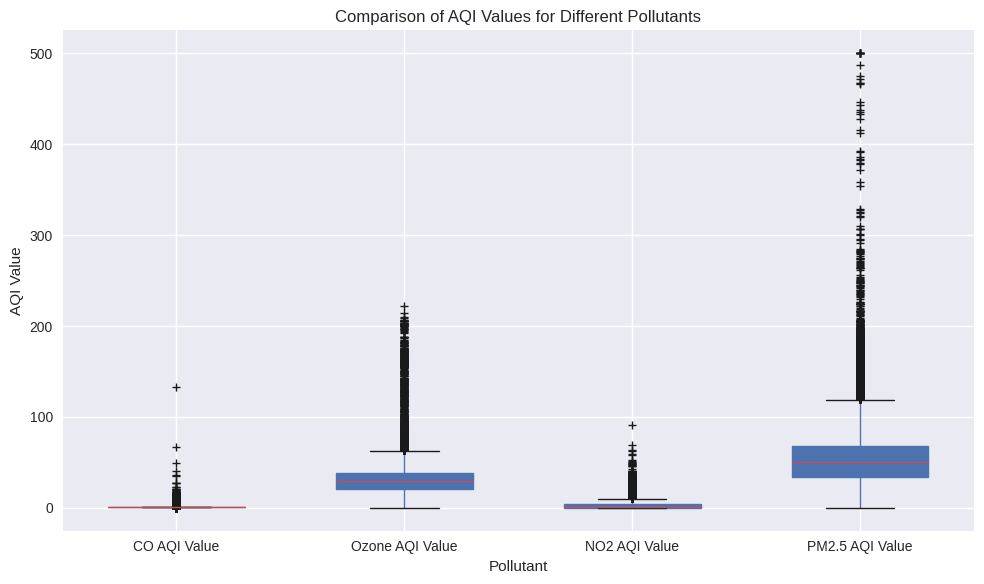

In [22]:
pollutants = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# Creating a DataFrame with only the selected pollutant columns
pollutant_data = airq[pollutants]

# Setting up the plot size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')

# Creating the boxplot
pollutant_data.boxplot(sym='k+', patch_artist=True, widths=0.6)

# Adding labels and title to the chart
plt.title('Comparison of AQI Values for Different Pollutants')
plt.xlabel('Pollutant')
plt.ylabel('AQI Value')

# Displaying the boxplot
plt.tight_layout()
plt.show()

## 4) Is there any correlation between AQI values and specific pollutants?

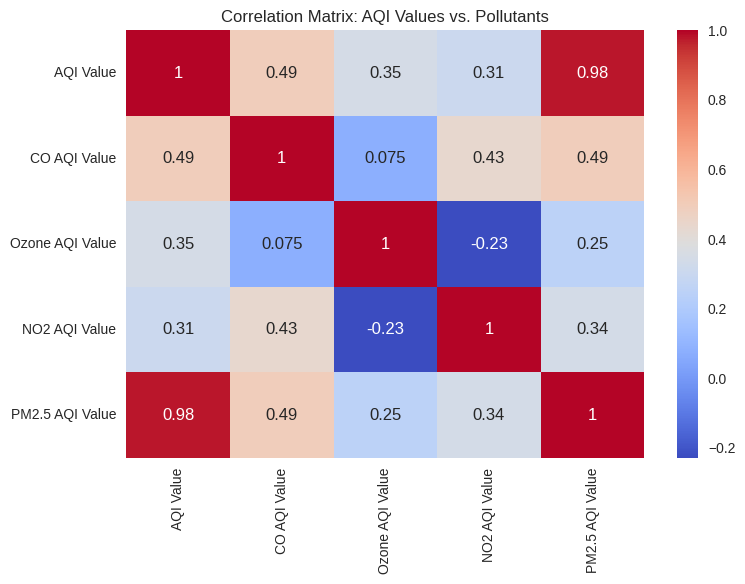

In [23]:
columns_of_interest = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# Creating a DataFrame with only the selected columns
data_of_interest = airq[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = data_of_interest.corr()

# Setting up the plot size
plt.figure(figsize=(8, 6))

# Creating the correlation heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Adding title to the chart
plt.title('Correlation Matrix: AQI Values vs. Pollutants')

# Displaying the heatmap
plt.tight_layout()
plt.show()

#### From the above heatmap, there seems to be a correlation between AQI and PM2.5 AQI values, higher the API, higher the PM2.5 AQI. 